# Artificial Intelligence exam project

Initial imports:

In [133]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time
from utils import *

In [134]:
!python3 -m minihack.scripts.env_list 

MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

In [206]:
env = gym.make("MiniHack-Room-Monster-15x15-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render() 


Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                .d.............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                .>.............                                 
                           

In [207]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>)

In [208]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

We now save the _state_ dataset's columns of interest:

In [209]:
game_map = state['chars']
game = state['pixel']

Rendering the map with matplotlib:

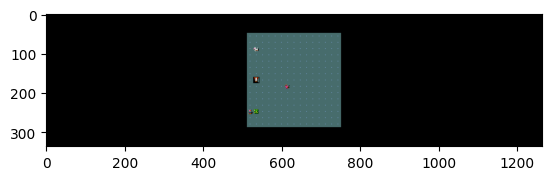

In [210]:
plt.imshow(state['pixel'])

-----------------------------

Method to find out where we are in the map:

In [211]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (15, 32)
Target position: (10, 33)


note: __we can add "set_enemy" and add a char in the matrix to add a monster/villain__ 

to add a monster: F

In [212]:
# game_map = set_enemy(game_map)

In [213]:
# plt.imshow(state['pixel'])

In [214]:
moves = get_valid_moves(game_map, start)
print(moves)

[(16, 32), (15, 33), (14, 32)]


In [215]:
player_moves = [start]
print(player_moves)
while player_moves[-1] != target:
    moves = get_valid_moves(game_map, player_moves[-1])
    min = float('inf')
    coord = (0,0)
    for move in moves:
        md = manhattan_distance(move, target)
        if md < min:
            min = md
            coord = move
    player_moves.append(coord)
print(player_moves)
sol = actions_from_path(player_moves[0], player_moves[1:]) 
print(sol)

[(15, 32)]
[(15, 32), (15, 33), (14, 33), (13, 33), (12, 33), (11, 33), (10, 33)]
[1, 0, 0, 0, 0, 0]


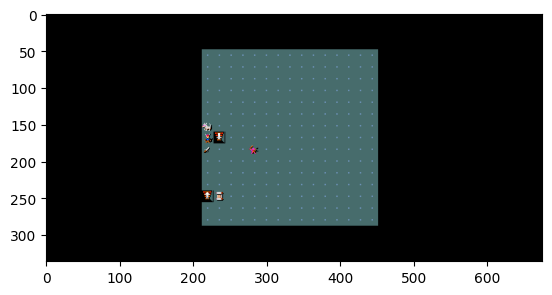

In [216]:
image = plt.imshow(game[:, 300:975])
for action in sol:
    time.sleep(0.5)
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975]) 